### Checking Python Environment Path

In [41]:
import sys
print(sys.executable)

/usr/bin/python3


### Importing Libraries

In [42]:
import csv
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence  import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Analyzing and Cleaning

### Importing CSV files and merging them all together

In [44]:
data = pd.concat(
    map(pd.read_csv, [
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2018Floor1.csv',
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2018Floor2.csv',
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2018Floor3.csv',
                        '/content/drive/MyDrive/electric_pred/Data_2018/2018Floor4.csv',
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2018Floor5.csv',
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2018Floor6.csv',
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2018Floor7.csv',
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2019Floor1.csv',
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2019Floor2.csv',
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2019Floor3.csv',
                      '/content/drive/MyDrive/electric_pred/Data_2019/Data_2019/2019Floor4.csv',
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2019Floor5.csv',
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2019Floor6.csv',
#                       '/kaggle/input/cubems-smart-building-energy-and-iaq-data/2019Floor7.csv',


                     ]),
    ignore_index=True)

data.head(5)

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
0,2018-07-01 00:00:00,0.0,0.0,0.0,8.74,0.00,0.22,28.28,62.50,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.15,27.73,62.86,0.0
1,2018-07-01 00:01:00,0.0,0.0,0.0,8.74,0.00,0.23,28.29,62.50,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.73,62.87,0.0
2,2018-07-01 00:02:00,0.0,0.0,0.0,8.61,0.00,0.22,28.29,62.50,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
3,2018-07-01 00:03:00,0.0,0.0,0.0,8.81,0.01,0.23,28.29,62.50,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
4,2018-07-01 00:04:00,0.0,0.0,0.0,8.89,0.00,0.22,28.29,62.51,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790560 entries, 0 to 790559
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          790560 non-null  object 
 1   z1_AC1(kW)    621829 non-null  float64
 2   z1_AC2(kW)    621829 non-null  float64
 3   z1_AC3(kW)    621829 non-null  float64
 4   z1_AC4(kW)    751579 non-null  float64
 5   z1_Light(kW)  707605 non-null  float64
 6   z1_Plug(kW)   756532 non-null  float64
 7   z1_S1(degC)   526125 non-null  float64
 8   z1_S1(RH%)    526128 non-null  float64
 9   z1_S1(lux)    526127 non-null  float64
 10  z2_AC1(kW)    751576 non-null  float64
 11  z2_Light(kW)  707605 non-null  float64
 12  z2_Plug(kW)   707605 non-null  float64
 13  z2_S1(degC)   519026 non-null  float64
 14  z2_S1(RH%)    519026 non-null  float64
 15  z2_S1(lux)    519027 non-null  float64
 16  z3_Light(kW)  756457 non-null  float64
 17  z3_Plug(kW)   756490 non-null  float64
 18  z4_A

### Sorting Dataframe values in order of Date & Time

In [46]:
# df['Date'] = pd.to_datetime(df['Date'])
data = data.sort_values(by='Date')

In [47]:
data.head(5)

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
0,2018-07-01 00:00:00,0.0,0.0,0.0,8.74,0.00,0.22,28.28,62.50,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.15,27.73,62.86,0.0
1,2018-07-01 00:01:00,0.0,0.0,0.0,8.74,0.00,0.23,28.29,62.50,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.73,62.87,0.0
2,2018-07-01 00:02:00,0.0,0.0,0.0,8.61,0.00,0.22,28.29,62.50,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
3,2018-07-01 00:03:00,0.0,0.0,0.0,8.81,0.01,0.23,28.29,62.50,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
4,2018-07-01 00:04:00,0.0,0.0,0.0,8.89,0.00,0.22,28.29,62.51,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0


In [48]:
data = data[1:]
data.head(5)

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
1,2018-07-01 00:01:00,0.0,0.0,0.0,8.74,0.00,0.23,28.29,62.50,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.73,62.87,0.0
2,2018-07-01 00:02:00,0.0,0.0,0.0,8.61,0.00,0.22,28.29,62.50,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
3,2018-07-01 00:03:00,0.0,0.0,0.0,8.81,0.01,0.23,28.29,62.50,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
4,2018-07-01 00:04:00,0.0,0.0,0.0,8.89,0.00,0.22,28.29,62.51,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
5,2018-07-01 00:05:00,0.0,0.0,0.0,8.68,0.00,0.23,28.29,62.51,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0


### Converting 'Date' column into DateTime Format

In [49]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790559 entries, 1 to 790559
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          790559 non-null  datetime64[ns]
 1   z1_AC1(kW)    621828 non-null  float64       
 2   z1_AC2(kW)    621828 non-null  float64       
 3   z1_AC3(kW)    621828 non-null  float64       
 4   z1_AC4(kW)    751578 non-null  float64       
 5   z1_Light(kW)  707604 non-null  float64       
 6   z1_Plug(kW)   756531 non-null  float64       
 7   z1_S1(degC)   526124 non-null  float64       
 8   z1_S1(RH%)    526127 non-null  float64       
 9   z1_S1(lux)    526126 non-null  float64       
 10  z2_AC1(kW)    751575 non-null  float64       
 11  z2_Light(kW)  707604 non-null  float64       
 12  z2_Plug(kW)   707604 non-null  float64       
 13  z2_S1(degC)   519025 non-null  float64       
 14  z2_S1(RH%)    519025 non-null  float64       
 15  z2_S1(lux)    519

### Graphs for different Devices and Zones

In [50]:

# data.set_index('Date')[['z1_Light(kW)', 'z1_Plug(kW)', 'z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)', 'z2_AC4(kW)', 'z2_Light(kW)',
#            'z2_Plug(kW)', 'z3_Light(kW)', 'z3_Plug(kW)', 'z4_Light(kW)', 'z1_AC1(kW)', 'z2_AC5(kW)', 'z2_AC6(kW)',
#            'z2_AC7(kW)', 'z2_AC8(kW)', 'z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)', 'z2_AC13(kW)',
#            'z2_AC14(kW)', 'z4_AC1(kW)', 'z4_Plug(kW)', 'z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)', 'z5_AC1(kW)','z5_Light(kW)',
#             'z5_Plug(kW)', 'z4_AC2(kW)', 'z4_AC3(kW)', 'z4_AC4(kW)', 'z1_S1(degC)', 'z2_S1(degC)', 'z3_S1(degC)', 'z4_S1(degC)',
#             'z5_S1(degC)', 'z1_S1(RH%)', 'z2_S1(RH%)', 'z3_S1(RH%)', 'z4_S1(RH%)', 'z5_S1(RH%)', 'z1_S1(lux)', 'z2_S1(lux)',
#             'z3_S1(lux)', 'z4_S1(lux)', 'z5_S1(lux)']].plot(subplots=True, figsize=(15,15))


# plt.figure(figsize=(14,5))
# sns.set_style("ticks")
# sns.lineplot(x=data['Date'],y=data['z1_Light(kW)'],color='blue')
# sns.despine()
# plt.title("Zone 1 Light Power Consumption(kW)",size='x-large',color='blue')

data.head()




,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
1,2018-07-01 00:01:00,0.0,0.0,0.0,8.74,0.00,0.23,28.29,62.50,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.73,62.87,0.0
2,2018-07-01 00:02:00,0.0,0.0,0.0,8.61,0.00,0.22,28.29,62.50,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
3,2018-07-01 00:03:00,0.0,0.0,0.0,8.81,0.01,0.23,28.29,62.50,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
4,2018-07-01 00:04:00,0.0,0.0,0.0,8.89,0.00,0.22,28.29,62.51,0.0,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
5,2018-07-01 00:05:00,0.0,0.0,0.0,8.68,0.00,0.23,28.29,62.51,0.0,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0


### Missing Values Heatmap

In [51]:
# num_ticks=19 #tick number for Y-axis
# plt.figure(figsize = (10,5))
# ax = sns.heatmap(data.isnull(), cbar=False)
# ax.set_yticks(np.linspace(0,100,num_ticks,dtype=np.integer))
# ax.set_title('Missing Values')
# plt.show()

In [52]:
data.reset_index()

,index,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
0,1,2018-07-01 00:01:00,0.0,0.0,0.0,8.74,0.00,0.23,28.29,62.50,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.73,62.87,0.0
1,2,2018-07-01 00:02:00,0.0,0.0,0.0,8.61,0.00,0.22,28.29,62.50,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
2,3,2018-07-01 00:03:00,0.0,0.0,0.0,8.81,0.01,0.23,28.29,62.50,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
3,4,2018-07-01 00:04:00,0.0,0.0,0.0,8.89,0.00,0.22,28.29,62.51,...,0.07,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
4,5,2018-07-01 00:05:00,0.0,0.0,0.0,8.68,0.00,0.23,28.29,62.51,...,0.08,NaN,NaN,NaN,0.0,0.0,0.14,27.72,62.88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790554,790555,2019-12-31 23:55:00,0.0,0.0,0.0,0.00,0.00,0.23,27.62,63.19,...,0.05,26.45,66.64,0.0,0.0,0.0,0.19,27.80,67.67,0.0
790555,790556,2019-12-31 23:56:00,0.0,0.0,0.0,0.00,0.01,0.23,27.63,63.17,...,0.03,26.45,66.68,0.0,0.0,0.0,0.14,27.80,67.70,0.0
790556,790557,2019-12-31 23:57:00,0.0,0.0,0.0,0.00,0.00,0.23,27.63,63.17,...,0.05,26.45,66.68,0.0,0.0,0.0,0.18,27.70,67.70,0.0
790557,790558,2019-12-31 23:58:00,0.0,0.0,0.0,0.00,0.00,0.23,27.62,63.18,...,0.03,26.45,66.65,0.0,0.0,0.0,0.14,27.80,67.70,0.0


### Solving Blank Cell Problem assuming Consumption Value '0'

In [53]:
data = data.fillna(0)

In [54]:
data.describe()

,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
count,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000,...,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000,790559.000000
mean,0.000309,0.009051,0.000966,4.514454,1.417981,0.963996,17.086992,41.557118,15.470694,3.220222,...,0.389162,13.619430,35.080700,13.975827,1.656883,0.469562,0.224868,16.189863,44.723494,12.273500
std,0.030544,0.133802,0.041527,9.664746,1.881480,1.066666,12.297406,29.713895,25.936497,7.003122,...,0.451110,12.448004,31.773315,25.024414,3.898456,0.725200,0.214992,11.720073,32.352634,25.061398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,...,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.380000,24.820000,59.310000,0.000000,0.000000,...,0.100000,18.980000,56.450000,0.000000,0.000000,0.000000,0.160000,23.580000,63.110000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,3.270000,1.400000,26.680000,63.790000,31.000000,0.000000,...,0.770000,25.340000,63.990000,8.000000,0.000000,1.010000,0.310000,25.190000,69.710000,1.000000
max,22.290000,20.280000,9.910000,51.690000,63.110000,87.110000,31.900000,78.800000,87.000000,58.400000,...,9.520000,30.990000,85.300000,111.000000,56.460000,58.610000,3.140000,30.900000,84.810000,87.000000


In [55]:
data.head(5)

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
1,2018-07-01 00:01:00,0.0,0.0,0.0,8.74,0.00,0.23,28.29,62.50,0.0,...,0.07,0.0,0.0,0.0,0.0,0.0,0.14,27.73,62.87,0.0
2,2018-07-01 00:02:00,0.0,0.0,0.0,8.61,0.00,0.22,28.29,62.50,0.0,...,0.08,0.0,0.0,0.0,0.0,0.0,0.14,27.72,62.88,0.0
3,2018-07-01 00:03:00,0.0,0.0,0.0,8.81,0.01,0.23,28.29,62.50,0.0,...,0.08,0.0,0.0,0.0,0.0,0.0,0.14,27.72,62.88,0.0
4,2018-07-01 00:04:00,0.0,0.0,0.0,8.89,0.00,0.22,28.29,62.51,0.0,...,0.07,0.0,0.0,0.0,0.0,0.0,0.14,27.72,62.88,0.0
5,2018-07-01 00:05:00,0.0,0.0,0.0,8.68,0.00,0.23,28.29,62.51,0.0,...,0.08,0.0,0.0,0.0,0.0,0.0,0.14,27.72,62.88,0.0


### Defining Target Variable

 Here We have converted Lux, DegC and Rh% into kW units for Data simplicity
(due to Consideration of GPU power and time)

kW  = Lux/100

kW  = [Temperature(degC)*2] + [Humidity(Rh%)/2]

In [56]:
# load_kw = ['z1_Light(kW)', 'z1_Plug(kW)', 'z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)', 'z2_AC4(kW)', 'z2_Light(kW)',
#            'z2_Plug(kW)', 'z3_Light(kW)', 'z3_Plug(kW)', 'z4_Light(kW)', 'z1_AC1(kW)', 'z2_AC5(kW)', 'z2_AC6(kW)',
#            'z2_AC7(kW)', 'z2_AC8(kW)', 'z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)', 'z2_AC13(kW)',
#            'z2_AC14(kW)', 'z4_AC1(kW)', 'z4_Plug(kW)', 'z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)', 'z5_AC1(kW)',
#            'z5_Light(kW)', 'z5_Plug(kW)', 'z4_AC2(kW)', 'z4_AC3(kW)', 'z4_AC4(kW)' ]

# load_degC = ['z1_S1(degC)', 'z2_S1(degC)', 'z3_S1(degC)', 'z4_S1(degC)', 'z5_S1(degC)']

# load_rh = ['z1_S1(RH%)', 'z2_S1(RH%)', 'z3_S1(RH%)', 'z4_S1(RH%)', 'z5_S1(RH%)' ]

# load_lux = ['z1_S1(lux)', 'z2_S1(lux)', 'z3_S1(lux)', 'z4_S1(lux)', 'z5_S1(lux)' ]

load_kw = ['z1_Light(kW)', 'z1_Plug(kW)', 'z2_AC1(kW)', 'z2_Light(kW)',
           'z2_Plug(kW)', 'z3_Light(kW)', 'z3_Plug(kW)', 'z4_Light(kW)', 'z4_AC1(kW)', 'z4_Plug(kW)', 'z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)', 'z5_AC1(kW)',
           'z5_Light(kW)', 'z5_Plug(kW)' ]

load_degC = ['z1_S1(degC)', 'z2_S1(degC)', 'z4_S1(degC)', 'z5_S1(degC)']

load_rh = ['z1_S1(RH%)', 'z2_S1(RH%)', 'z4_S1(RH%)', 'z5_S1(RH%)' ]

load_lux = ['z1_S1(lux)', 'z2_S1(lux)', 'z4_S1(lux)', 'z5_S1(lux)' ]

data['total_kw'] = data.loc[ :, load_kw].sum(axis = 1)

data['total_lux'] = (data.loc[ :, load_lux].sum(axis=1))/100

data['total_rh'] = (data.loc[ :, load_rh].sum(axis=1))/2

data['total_degC'] = (data.loc[ :, load_degC].sum(axis=1))*2


data.head(5)





,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux),total_kw,total_lux,total_rh,total_degC
1,2018-07-01 00:01:00,0.0,0.0,0.0,8.74,0.00,0.23,28.29,62.50,0.0,...,0.0,0.0,0.14,27.73,62.87,0.0,9.74,0.0,95.555,166.66
2,2018-07-01 00:02:00,0.0,0.0,0.0,8.61,0.00,0.22,28.29,62.50,0.0,...,0.0,0.0,0.14,27.72,62.88,0.0,9.61,0.0,95.560,166.64
3,2018-07-01 00:03:00,0.0,0.0,0.0,8.81,0.01,0.23,28.29,62.50,0.0,...,0.0,0.0,0.14,27.72,62.88,0.0,9.83,0.0,95.555,166.64
4,2018-07-01 00:04:00,0.0,0.0,0.0,8.89,0.00,0.22,28.29,62.51,0.0,...,0.0,0.0,0.14,27.72,62.88,0.0,9.88,0.0,95.560,166.62
5,2018-07-01 00:05:00,0.0,0.0,0.0,8.68,0.00,0.23,28.29,62.51,0.0,...,0.0,0.0,0.14,27.72,62.88,0.0,9.69,0.0,95.560,166.62


# Target Variable Dataframe and its Statistical Data

In [57]:
new_data = pd.DataFrame()
new_data['total_kw'] = data.loc[:, ['total_kw', 'total_lux', 'total_rh', 'total_degC']].sum(axis=1)

new_data.head(5)

,total_kw
1,271.955
2,271.810
3,272.025
4,272.060
5,271.870


In [58]:
new_data.describe()

,total_kw
count,790559.000000
mean,229.250092
std,150.505799
min,0.000000
25%,15.290000
50%,312.965000
75%,347.395000
max,485.635000


# Data Preprocessing

### Data Normalization using MinMaxScaler

In [59]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(new_data)

In [60]:
data_scaled

array([[0.55999876],
       [0.55970019],
       [0.56014291],
       ...,
       [0.71916151],
       [0.71929536],
       [0.71941891]])

In [61]:
features = data_scaled
target = data_scaled[:,0]

# Training

In [62]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.55999876],
         [0.55970019]]]),
 array([0.56014291]))

### Split Data into Train and Test (80-20)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [64]:
x_train.shape

(632447, 1)

In [65]:
x_test.shape

(158112, 1)

In [71]:
win_length= 480
batch_size = 256
num_features=1

train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)


In [72]:
train_generator[0]

(array([[[0.55999876],
         [0.55970019],
         [0.56014291],
         ...,
         [0.74846335],
         [0.74819566],
         [0.74831921]],
 
        [[0.55970019],
         [0.56014291],
         [0.56021498],
         ...,
         [0.74819566],
         [0.74831921],
         [0.74825744]],
 
        [[0.56014291],
         [0.56021498],
         [0.55982374],
         ...,
         [0.74831921],
         [0.74825744],
         [0.74840158]],
 
        ...,
 
        [[0.73861027],
         [0.7385382 ],
         [0.73802341],
         ...,
         [0.7534877 ],
         [0.75375539],
         [0.75395101]],
 
        [[0.7385382 ],
         [0.73802341],
         [0.73798223],
         ...,
         [0.75375539],
         [0.75395101],
         [0.75333326]],
 
        [[0.73802341],
         [0.73798223],
         [0.7378072 ],
         ...,
         [0.75395101],
         [0.75333326],
         [0.75352888]]]),
 array([0.74825744, 0.74840158, 0.74725874, 0.74748525,

### Neural Network Layers

### Univariate LSTM Model

In [73]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape = (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(32, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(16, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 480, 32)           4352      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 480, 32)           0         
                                                                 
 lstm_7 (LSTM)               (None, 480, 32)           8320      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 480, 32)           0         
                                                                 
 dropout_4 (Dropout)         (None, 480, 32)           0         
                                                                 
 lstm_8 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_5 (Dropout)         (None, 16)               

### Early Stopping Criterias

In [75]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode=min)

model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

Epoch 1/50
2469/2469 [==============================] - 144s 55ms/step - loss: 0.0080 - mean_absolute_error: 0.0545 - val_loss: 0.0016 - val_mean_absolute_error: 0.0287
Epoch 2/50
2469/2469 [==============================] - 135s 55ms/step - loss: 0.0037 - mean_absolute_error: 0.0433 - val_loss: 9.2267e-04 - val_mean_absolute_error: 0.0181
Epoch 3/50
2469/2469 [==============================] - 137s 56ms/step - loss: 0.0033 - mean_absolute_error: 0.0400 - val_loss: 6.3508e-04 - val_mean_absolute_error: 0.0133
Epoch 4/50
2469/2469 [==============================] - 148s 60ms/step - loss: 0.0030 - mean_absolute_error: 0.0373 - val_loss: 5.0139e-04 - val_mean_absolute_error: 0.0108
Epoch 5/50
2469/2469 [==============================] - 136s 55ms/step - loss: 0.0029 - mean_absolute_error: 0.0362 - val_loss: 4.6760e-04 - val_mean_absolute_error: 0.0090
Epoch 6/50
2469/2469 [==============================] - 133s 54ms/step - loss: 0.0029 - mean_absolute_error: 0.0369 - val_loss: 4.9147e-04 

In [77]:
model.evaluate(test_generator, verbose=0)

[0.0004644785076379776, 0.00895332545042038]

In [79]:
predictions=model.predict(test_generator)

616/616 [==============================] - 13s 21ms/step


In [80]:
predictions.shape[0]

157632

In [81]:
predictions

array([[0.534716  ],
       [0.53547114],
       [0.53647894],
       ...,
       [0.7120278 ],
       [0.71191704],
       [0.7120006 ]], dtype=float32)

In [82]:
y_test

array([0.50902427, 0.50946699, 0.50932285, ..., 0.71916151, 0.71929536,
       0.71941891])

In [83]:
x_test

array([[0.50902427],
       [0.50946699],
       [0.50932285],
       ...,
       [0.71916151],
       [0.71929536],
       [0.71941891]])

In [84]:
x_test[:,1:][win_length:]

array([], shape=(157632, 0), dtype=float64)

In [85]:
df_pred= pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

### Reverse Transformation of Scaled Data into Original Data

In [86]:
rev_trans = scaler.inverse_transform(df_pred)

In [87]:
rev_trans

array([[259.67682],
       [260.04352],
       [260.53296],
       ...,
       [345.7856 ],
       [345.73184],
       [345.77243]], dtype=float32)

## Output

In [88]:
df_final = data[predictions.shape[0]*-1:]

In [89]:
df_final.count()

Date            157632
z1_AC1(kW)      157632
z1_AC2(kW)      157632
z1_AC3(kW)      157632
z1_AC4(kW)      157632
z1_Light(kW)    157632
z1_Plug(kW)     157632
z1_S1(degC)     157632
z1_S1(RH%)      157632
z1_S1(lux)      157632
z2_AC1(kW)      157632
z2_Light(kW)    157632
z2_Plug(kW)     157632
z2_S1(degC)     157632
z2_S1(RH%)      157632
z2_S1(lux)      157632
z3_Light(kW)    157632
z3_Plug(kW)     157632
z4_AC1(kW)      157632
z4_Light(kW)    157632
z4_Plug(kW)     157632
z4_S1(degC)     157632
z4_S1(RH%)      157632
z4_S1(lux)      157632
z5_AC1(kW)      157632
z5_Light(kW)    157632
z5_Plug(kW)     157632
z5_S1(degC)     157632
z5_S1(RH%)      157632
z5_S1(lux)      157632
total_kw        157632
total_lux       157632
total_rh        157632
total_degC      157632
dtype: int64

In [92]:
df_final['App_Pred'] = rev_trans[:,0]

<ipython-input-92-bf702c672f48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred'] = rev_trans[:,0]


In [93]:
df_final.head(5)

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux),total_kw,total_lux,total_rh,total_degC,App_Pred
632928,2019-09-13 12:48:00,0.0,0.0,0.0,0.0,3.33,2.57,25.82,52.27,66.0,...,1.48,0.61,25.10,76.41,76.0,14.95,1.99,94.515,148.70,259.676819
632929,2019-09-13 12:49:00,0.0,0.0,0.0,0.0,3.33,2.50,25.85,52.39,66.0,...,1.48,0.62,25.10,76.50,75.0,14.88,1.98,94.845,148.84,260.043518
632930,2019-09-13 12:50:00,0.0,0.0,0.0,0.0,3.66,2.64,25.87,52.28,68.0,...,1.48,0.61,25.60,77.26,76.0,14.89,2.01,94.860,149.90,260.532959
632931,2019-09-13 12:51:00,0.0,0.0,0.0,0.0,4.37,2.77,25.89,52.60,68.0,...,1.49,0.61,25.11,77.11,76.0,16.00,2.01,95.005,149.02,261.459015
632932,2019-09-13 12:52:00,0.0,0.0,0.0,0.0,4.56,2.61,25.92,52.19,68.0,...,1.49,0.61,25.13,76.65,75.0,16.37,2.00,94.480,149.14,261.876556


<Axes: >

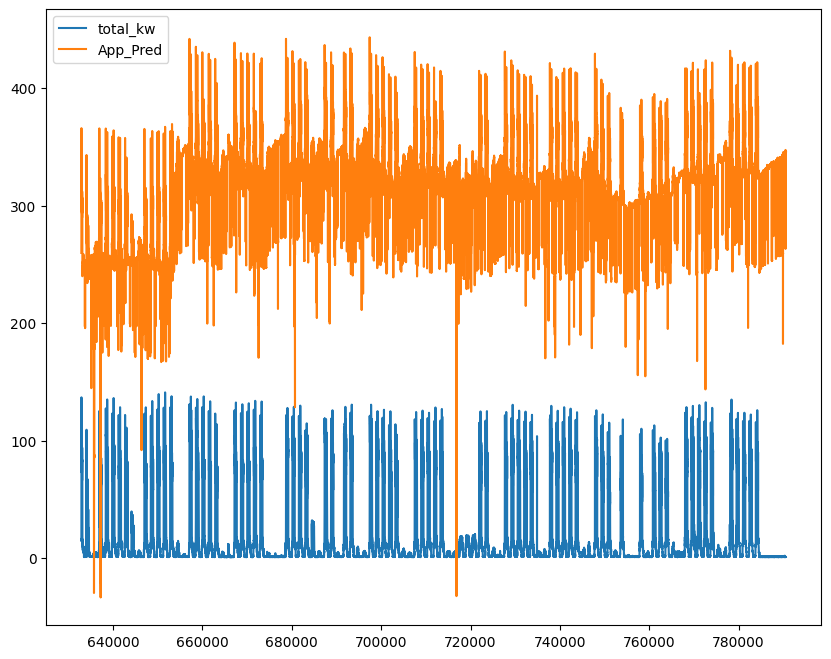

In [95]:
df_final[['total_kw', 'App_Pred']].plot()